In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

from pandas.api.types import is_numeric_dtype, is_string_dtype


# **EDA of Uber and Lyft Dataset**

In [2]:
# Load the CSV file into a DataFrame
ride_data = pd.read_csv('rideshare_kaggle.csv')

# Display the first few rows of the DataFrame
ride_data.head(2)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600


In [4]:
# Display the data type and information about data
ride_data_copy = ride_data
ride_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [5]:
# Get updated list of numerical & categorical features
categorical_data = list(ride_data_copy.select_dtypes(include=['object','category']).columns)
numerical_data = list(set(ride_data_copy.select_dtypes(exclude=['datetime64']).columns) - set(categorical_data))

# Show descriptive statistics
ride_data_copy[numerical_data].describe()

,visibility.1,distance,apparentTemperatureMax,longitude,temperatureHighTime,pressure,windBearing,temperature,temperatureMaxTime,windGustTime,...,temperatureLowTime,surge_multiplier,windGust,apparentTemperatureHigh,price,temperatureMin,apparentTemperatureMaxTime,apparentTemperatureHighTime,sunsetTime,apparentTemperatureLowTime
count,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,...,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,6.930710e+05,6.930710e+05,6.930710e+05,6.930710e+05
mean,8.467970,2.189430,41.997343,-71.066151,1.544050e+09,1010.094766,220.055853,39.584388,1.544047e+09,1.544049e+09,...,1.544102e+09,1.013870,8.469860,41.614054,16.545125,33.457774,1.544048e+09,1.544050e+09,1.544060e+09,1.544099e+09
std,2.602888,1.138937,6.936841,0.020302,6.937921e+05,13.472899,99.102736,6.726084,6.901353e+05,6.928244e+05,...,6.922923e+05,0.091641,5.289179,7.666138,9.324359,6.467224,6.910777e+05,6.941699e+05,6.906634e+05,6.927378e+05
min,0.717000,0.020000,28.950000,-71.105400,1.543154e+09,988.090000,2.000000,18.910000,1.543154e+09,1.543151e+09,...,1.543234e+09,1.000000,0.800000,22.620000,2.500000,15.630000,1.543187e+09,1.543187e+09,1.543181e+09,1.543234e+09
25%,8.432000,1.280000,36.570000,-71.081000,1.543439e+09,999.820000,124.000000,36.450000,1.543439e+09,1.543432e+09,...,1.543489e+09,1.000000,4.060000,36.570000,9.000000,30.170000,1.543439e+09,1.543439e+09,1.543440e+09,1.543478e+09
50%,9.880000,2.160000,40.950000,-71.063100,1.543788e+09,1009.250000,258.000000,40.490000,1.543788e+09,1.543756e+09,...,1.543817e+09,1.000000,7.550000,40.950000,13.500000,34.240000,1.543788e+09,1.543788e+09,1.543785e+09,1.543817e+09
75%,9.996000,2.920000,44.120000,-71.054200,1.544814e+09,1021.860000,303.000000,43.580000,1.544814e+09,1.544846e+09,...,1.544836e+09,1.000000,11.740000,44.120000,22.500000,38.880000,1.544818e+09,1.544818e+09,1.544822e+09,1.544836e+09
max,10.000000,7.860000,57.200000,-71.033000,1.545160e+09,1035.550000,356.000000,57.220000,1.545109e+09,1.545127e+09,...,1.545221e+09,3.000000,27.250000,57.200000,97.500000,43.100000,1.545109e+09,1.545160e+09,1.545168e+09,1.545199e+09


Data Cleaning

In [6]:
# Display number of duplicate rows
ride_data_copy.duplicated().sum()


0

In [7]:
# Count number of rows containing nulls
ride_data_copy.isnull().sum()


id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [8]:
# Display prportion of null rows
null_perc = round(ride_data_copy.isnull().sum().sum() / len(ride_data_copy),4)
print(null_perc)

ride_data_copy['price'] = ride_data_copy['price'].fillna(ride_data_copy['distance']*1.45)
ride_data_copy.isnull().sum()

ride_data_copy.shape

0.0795


(693071, 57)

In [9]:
ride_data_copy=ride_data_copy.dropna()

**Data Reduction**

In [10]:
# Seprate column names which showing time
time_data = list(ride_data_copy.filter(regex='Time|time').columns)
time_data

print(ride_data_copy['timezone'].unique())

# Remove timezone because it stores categorical value
time_data.remove('timezone')


['America/New_York']


In [11]:
# Convert timestamp & time-character to datetime data type
for col in time_data:
    if is_numeric_dtype(ride_data_copy[col]) == True:
        ride_data_copy[col] = pd.to_datetime(ride_data_copy[col],unit='s')
    elif is_string_dtype(ride_data_copy[col]) == True:
        ride_data_copy[col] = pd.to_datetime(ride_data_copy[col])

ride_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  datetime64[ns]
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_type                     693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  name                      

In [12]:
# Both variable name seems similar so we check consistconsistency between 2 variables
(ride_data_copy['visibility'] == ride_data_copy['visibility.1']).unique()

array([ True])

In [13]:
# Remove icon because it's value alreaday available in short_summary and long_summary
# Remove visibility.1 because both variables store same data
# Remove product_id because names variable have same entries but name provide more descriptive label so keep names variable
ride_data_copy = ride_data_copy.drop(['product_id','icon','visibility.1'],axis=1)

ride_data_copy= ride_data_copy.drop(['timezone','timestamp','ozone', 'moonPhase','sunriseTime', 'sunsetTime', 'uvIndex', 'uvIndexTime', 'windGustTime'],axis=1)

# Rename name to service_type
ride_data_copy.rename(columns={'name': 'service_type','source': 'pick_up'}, inplace=True)

ride_data_copy.head()


,id,hour,day,month,datetime,pick_up,destination,cab_type,service_type,price,...,cloudCover,precipIntensityMax,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,...,0.72,0.1276,39.89,2018-12-17 02:00:00,43.68,2018-12-16 14:00:00,33.73,2018-12-17 02:00:00,38.07,2018-12-16 11:00:00
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,...,1.00,0.1300,40.49,2018-11-26 12:00:00,47.30,2018-11-26 17:00:00,36.20,2018-11-27 04:00:00,43.92,2018-11-26 17:00:00
2,981a3613-77af-4620-a42a-0c0866077d1e,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,...,0.03,0.1064,35.36,2018-11-28 04:00:00,47.55,2018-11-27 12:00:00,31.04,2018-11-28 04:00:00,44.12,2018-11-27 12:00:00
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,...,0.00,0.0000,34.67,2018-11-30 04:00:00,45.03,2018-11-29 17:00:00,30.30,2018-11-30 04:00:00,38.53,2018-11-29 17:00:00
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,...,0.44,0.0001,33.10,2018-11-28 11:00:00,42.18,2018-11-28 16:00:00,29.11,2018-11-28 08:00:00,35.75,2018-11-28 16:00:00


**Data Distribution Analysis**

In [14]:
# Display categorical data
categorical_data = list(ride_data_copy.select_dtypes(include=['object','category']).columns)
categorical_data

['id',
 'pick_up',
 'destination',
 'cab_type',
 'service_type',
 'short_summary',
 'long_summary']

In [15]:
# Display numerical data
numerical_data = list(np.setdiff1d(list(ride_data_copy.select_dtypes(exclude=['datetime64']).columns),categorical_data))
numerical_data

['apparentTemperature',
 'apparentTemperatureHigh',
 'apparentTemperatureLow',
 'apparentTemperatureMax',
 'apparentTemperatureMin',
 'cloudCover',
 'day',
 'dewPoint',
 'distance',
 'hour',
 'humidity',
 'latitude',
 'longitude',
 'month',
 'precipIntensity',
 'precipIntensityMax',
 'precipProbability',
 'pressure',
 'price',
 'surge_multiplier',
 'temperature',
 'temperatureHigh',
 'temperatureLow',
 'temperatureMax',
 'temperatureMin',
 'visibility',
 'windBearing',
 'windGust',
 'windSpeed']

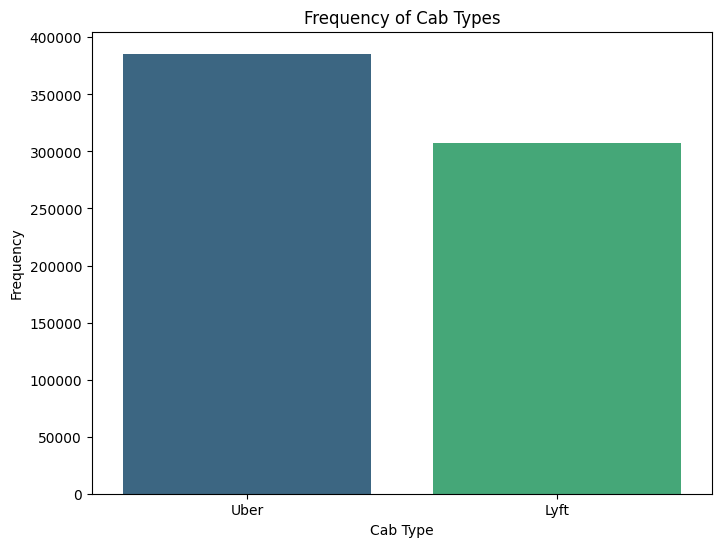

In [16]:
# Count number of Uber rides vs Lyft rides
cab_type_counts = ride_data_copy['cab_type'].value_counts()

# Plot histogram for cab_type
plt.figure(figsize=(8, 6))
sns.barplot(x=cab_type_counts.index, y=cab_type_counts.values, palette='viridis')
plt.title('Frequency of Cab Types')
plt.xlabel('Cab Type')
plt.ylabel('Frequency')
plt.show()

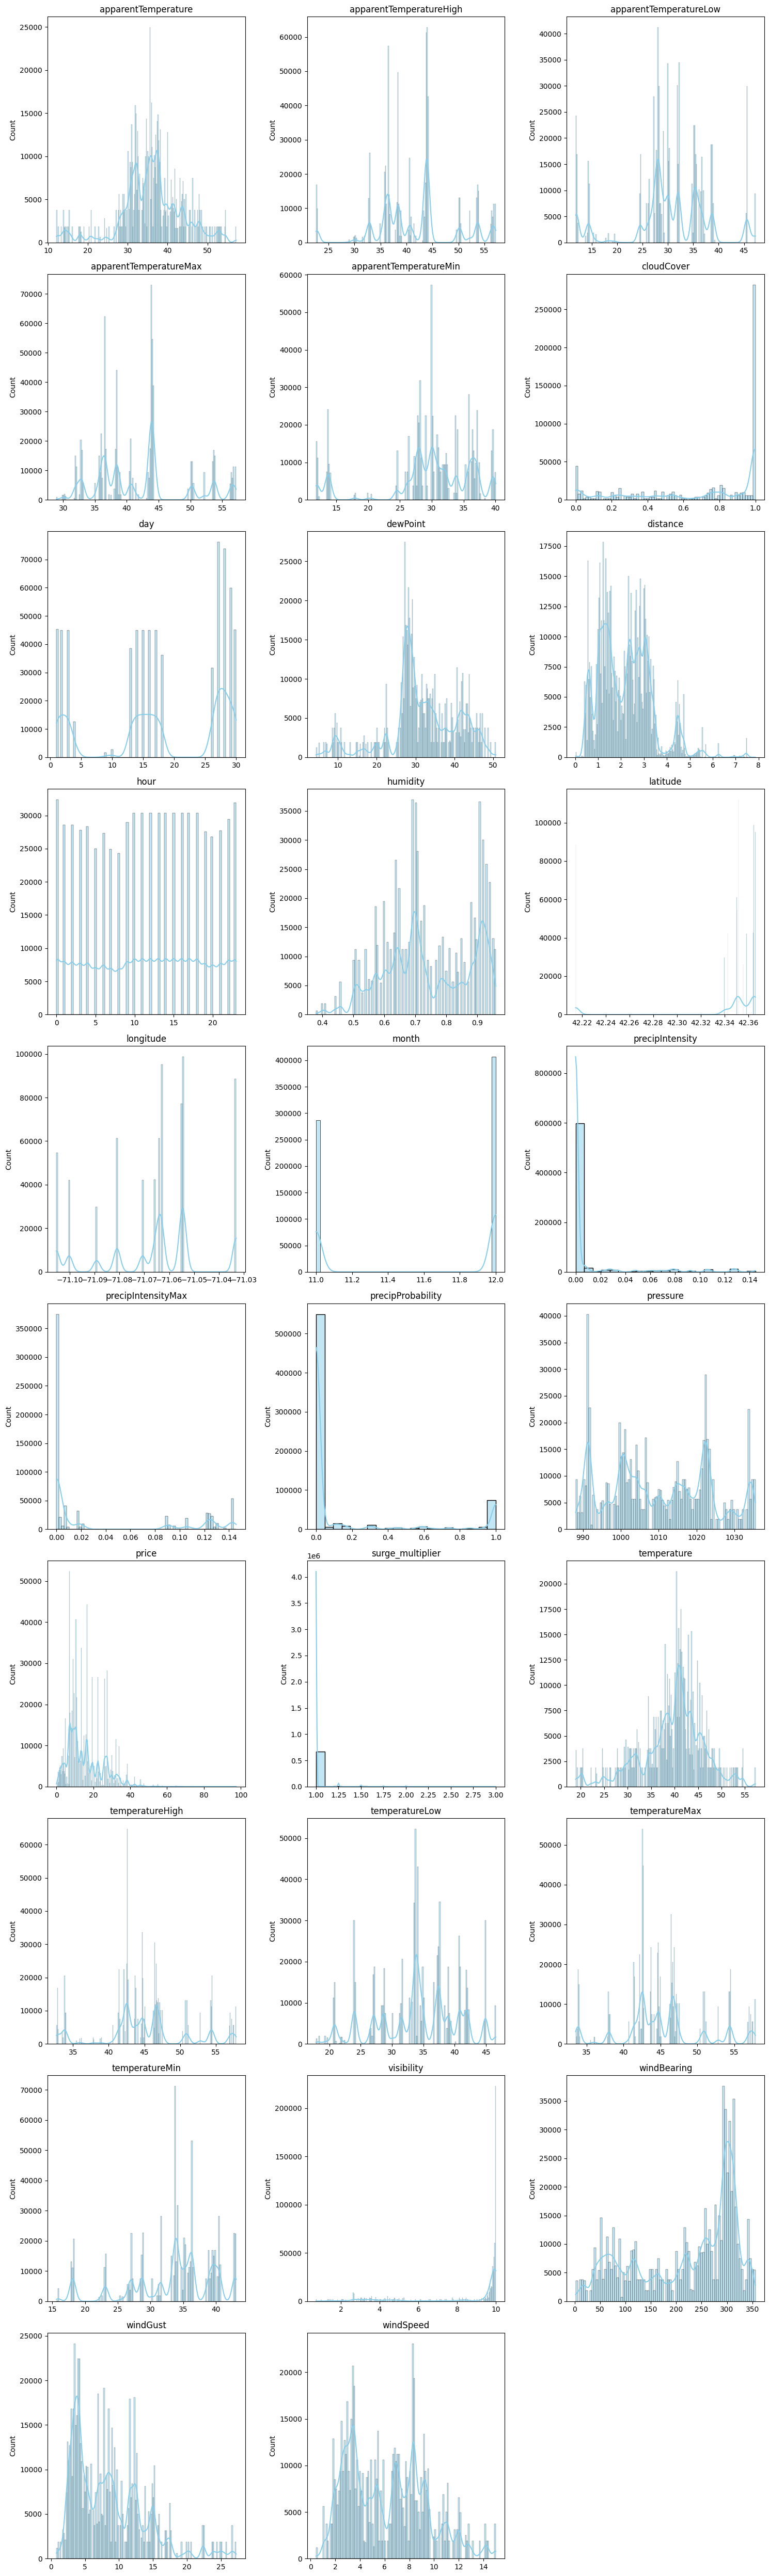

In [17]:
# Numeric data distribution visualization (histograms)
num_cols = len(numerical_data)
num_rows = math.ceil(num_cols / 3)

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numerical_data):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(ride_data_copy[col], kde=True, color='skyblue')
    plt.title(col)
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [18]:
numerical_data

['apparentTemperature',
 'apparentTemperatureHigh',
 'apparentTemperatureLow',
 'apparentTemperatureMax',
 'apparentTemperatureMin',
 'cloudCover',
 'day',
 'dewPoint',
 'distance',
 'hour',
 'humidity',
 'latitude',
 'longitude',
 'month',
 'precipIntensity',
 'precipIntensityMax',
 'precipProbability',
 'pressure',
 'price',
 'surge_multiplier',
 'temperature',
 'temperatureHigh',
 'temperatureLow',
 'temperatureMax',
 'temperatureMin',
 'visibility',
 'windBearing',
 'windGust',
 'windSpeed']

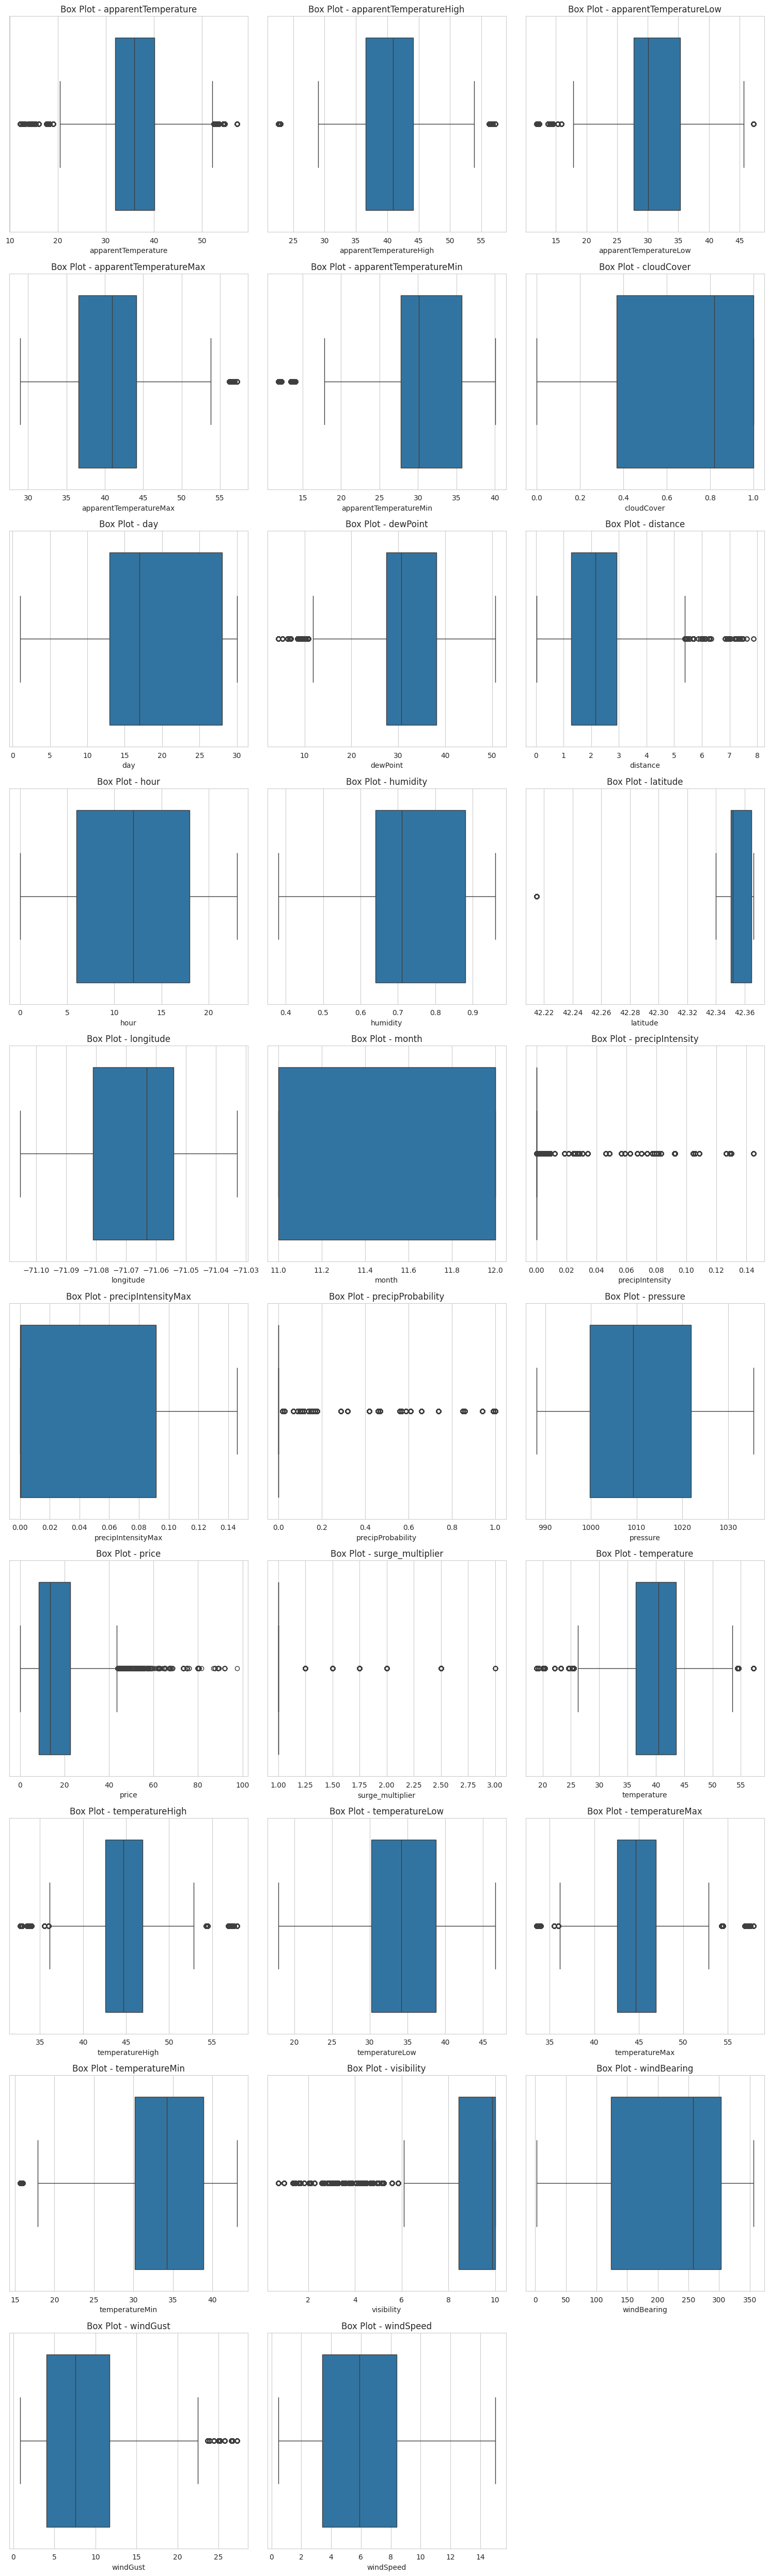

In [20]:
# Outliers Analysis
sns.set_style("whitegrid")


total_numerical_features = len(numerical_data)


num_rows = math.ceil(total_numerical_features / 3)
num_cols = min(3, total_numerical_features)


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))


axes = axes.flatten()


for i, feature in enumerate(numerical_data):
    sns.boxplot(x=ride_data_copy[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot - {feature}')


for i in range(total_numerical_features, len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()


plt.show()

In [21]:
def remove_outliers(df, numerical_column):

    Q1 = df[numerical_column].quantile(0.25)

    Q3 = df[numerical_column].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR

    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[numerical_column] >= lower_bound) & (df[numerical_column] <= upper_bound)]

    return df_filtered


cleaned_data = ride_data_copy.copy()

for numerical_column in numerical_data:
    cleaned_data = remove_outliers(cleaned_data, numerical_column)

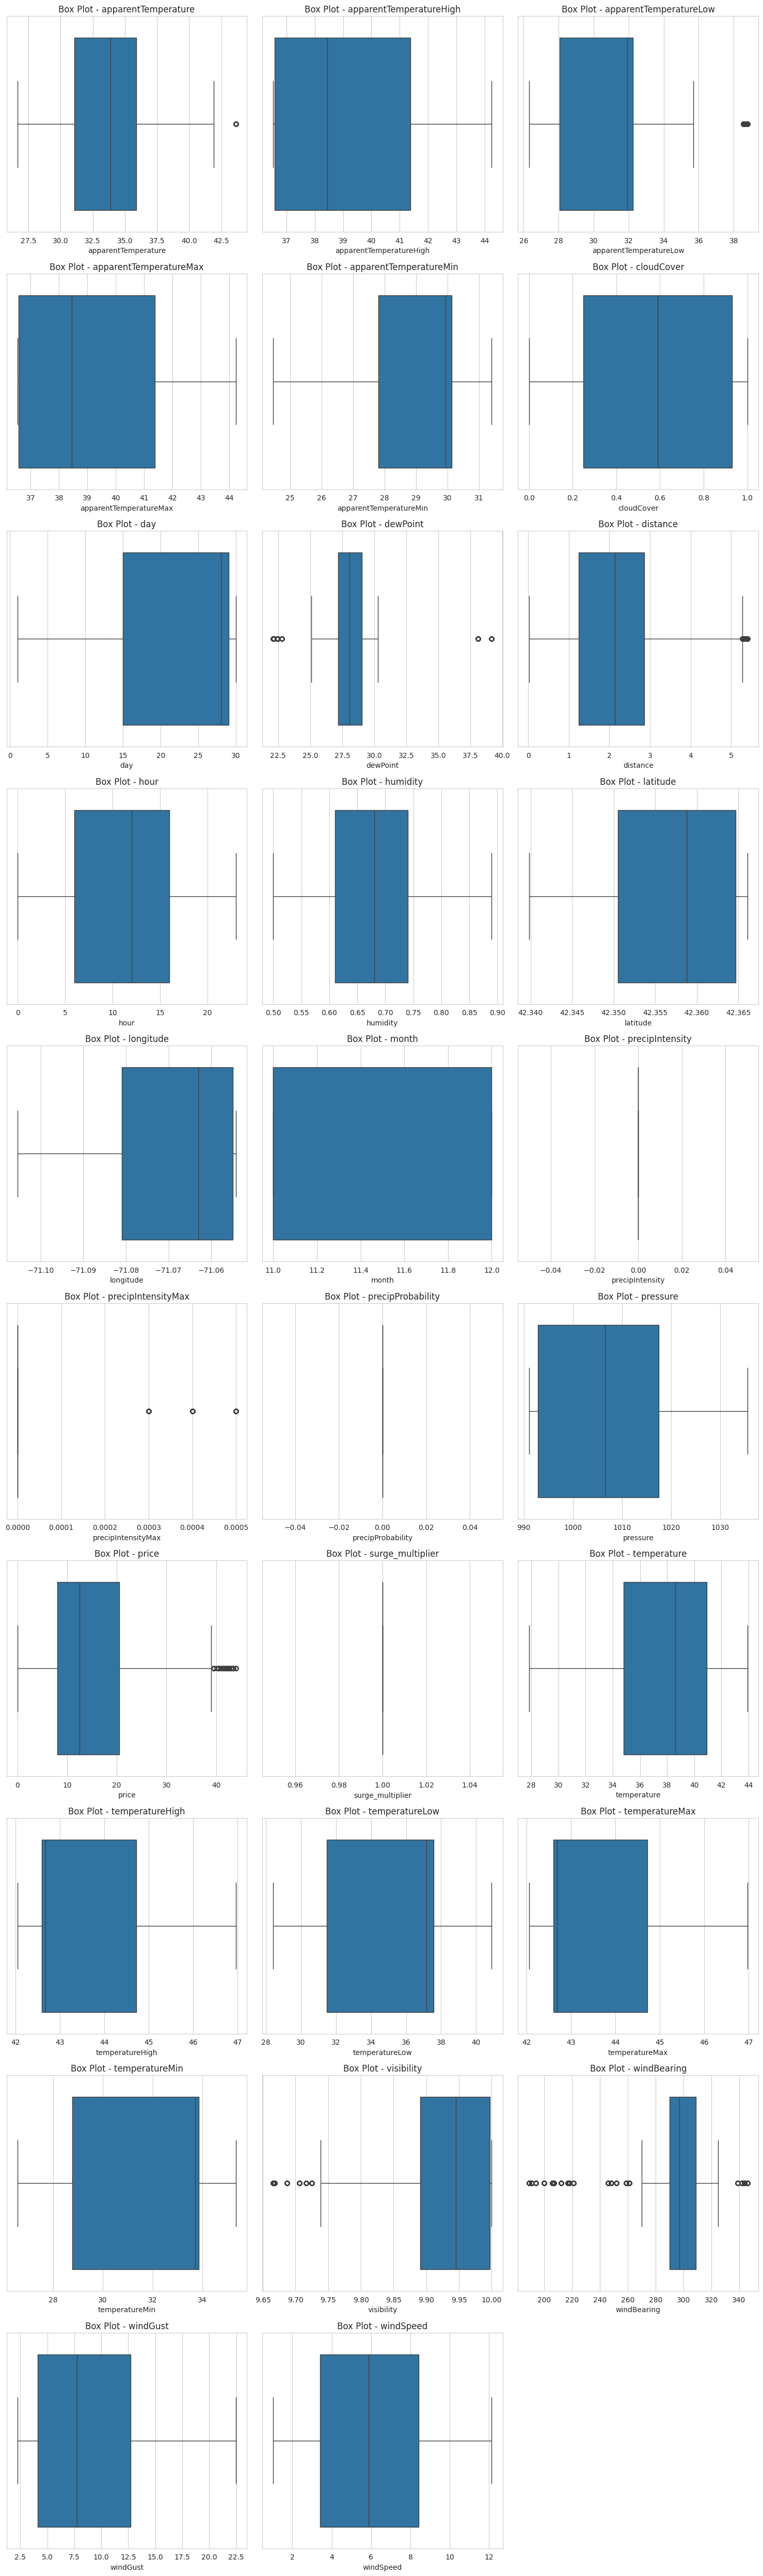

In [22]:
sns.set_style("whitegrid")


total_numerical_features = len(numerical_data)


num_rows = math.ceil(total_numerical_features / 3)
num_cols = min(3, total_numerical_features)


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))


axes = axes.flatten()


for i, feature in enumerate(numerical_data):
    sns.boxplot(x=cleaned_data[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot - {feature}')


for i in range(total_numerical_features, len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()


plt.show()

price                      1.000000
distance                   0.299093
cloudCover                 0.005384
windSpeed                  0.004102
temperature                0.003865
windGust                   0.003732
apparentTemperatureLow     0.003667
hour                       0.003225
apparentTemperature        0.003112
temperatureMin             0.002874
month                      0.002433
temperatureLow             0.002340
apparentTemperatureMin     0.001948
temperatureHigh            0.001937
temperatureMax             0.001937
dewPoint                   0.001498
windBearing                0.001066
latitude                   0.000843
longitude                  0.000170
apparentTemperatureHigh    0.000100
apparentTemperatureMax     0.000100
visibility                -0.000332
pressure                  -0.000881
day                       -0.003133
humidity                  -0.003563
precipIntensityMax        -0.005416
precipIntensity                 NaN
precipProbability           

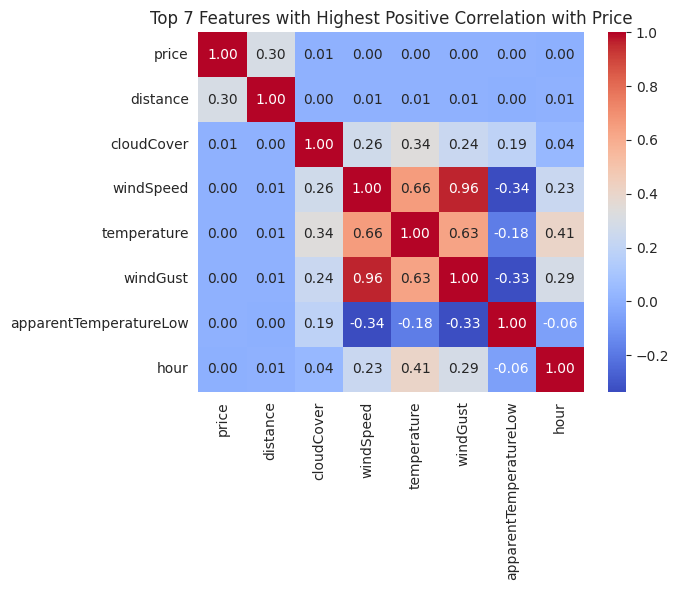

In [23]:
numerical_data_corr = cleaned_data[numerical_data]
corr_matrix = numerical_data_corr.corr()


price_corr = corr_matrix['price'].sort_values(ascending=False)
print(price_corr)

top_positive_corr_features = price_corr.head(8)

top_positive_corr_features_names = top_positive_corr_features.index.tolist()



print(top_positive_corr_features)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(numerical_data_corr[top_positive_corr_features_names].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 7 Features with Highest Positive Correlation with Price')

plt.tight_layout()
plt.show()


apparentTemperatureHigh    0.000100
apparentTemperatureMax     0.000100
visibility                -0.000332
pressure                  -0.000881
day                       -0.003133
humidity                  -0.003563
precipIntensityMax        -0.005416
Name: price, dtype: float64


Text(0.5, 1.0, 'Top 7 Features with Highest Negative Correlation with Price')

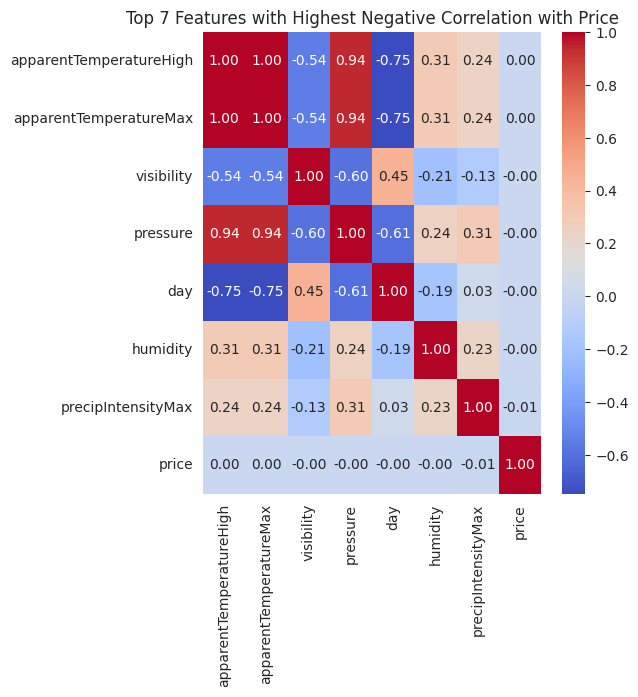

In [24]:
price_corr = price_corr.dropna()

top_negative_corr_features = price_corr.tail(7)

print(top_negative_corr_features)

top_negative_corr_features_names = top_negative_corr_features.index.tolist()
top_negative_corr_features_names.append('price')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix.loc[top_negative_corr_features_names, top_negative_corr_features_names], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 7 Features with Highest Negative Correlation with Price')


In [ ]:
cleaned_data.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'pick_up', 'destination',
       'cab_type', 'service_type', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'short_summary', 'long_summary', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'precipIntensityMax',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')

## **Model Development**

**Target Variable**
- Price
- Cab Type

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

In [ ]:
cleaned_data.columns

Index(['id', 'hour', 'day', 'month', 'datetime', 'pick_up', 'destination',
       'cab_type', 'service_type', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'short_summary', 'long_summary', 'precipIntensity', 'precipProbability',
       'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'precipIntensityMax',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')

In [ ]:
selected_categorical= ['pick_up','destination','cab_type','service_type']

df_encoded = pd.get_dummies(cleaned_data, columns=selected_categorical, drop_first=True)

columns_to_drop = ['id', 'long_summary', 'short_summary','datetime']
df_encoded = df_encoded.drop(columns=columns_to_drop)

datetime_columns = df_encoded.select_dtypes(include=['datetime64']).columns
df_encoded = df_encoded.drop(columns=datetime_columns)

X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)

print(x_train.columns)
print(len(x_train), "Test",len(x_test) )


Index(['hour', 'day', 'month', 'distance', 'surge_multiplier', 'latitude',
       'longitude', 'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'precipIntensityMax', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax',
       'pick_up_Beacon Hill', 'pick_up_Boston University', 'pick_up_Fenway',
       'pick_up_Financial District', 'pick_up_Haymarket Square',
       'pick_up_North End', 'pick_up_North Station',
       'pick_up_Northeastern University', 'pick_up_South Station',
       'pick_up_Theatre District', 'pick_up_West End',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'd

**Linear Regression Technique**

In [ ]:
linear_reg = LinearRegression()

linear_reg.fit(x_train, y_train)

linear_reg_predictions = linear_reg.predict(x_test)

linear_reg_rmse = mean_squared_error(y_test, linear_reg_predictions, squared=False)

linear_reg_r2 = r2_score(y_test, linear_reg_predictions)

print("R2:", linear_reg_r2)
print("RMSE:",linear_reg_rmse)

R2: 0.9463933821503081
RMSE: 2.0877010230807906


***Using Feature Selection***

In [ ]:

from sklearn.feature_selection import RFE

lr = LinearRegression()

selector = RFE(lr)

selector.fit(x_train, y_train)

selected_features = x_train.columns[selector.support_]

lr.fit(x_train[selected_features], y_train)

y_pred = lr.predict(x_test[selected_features])

rmse = mean_squared_error(y_test, y_pred, squared=False)


print("RMSE:", rmse)


RMSE: 2.0900475611386486


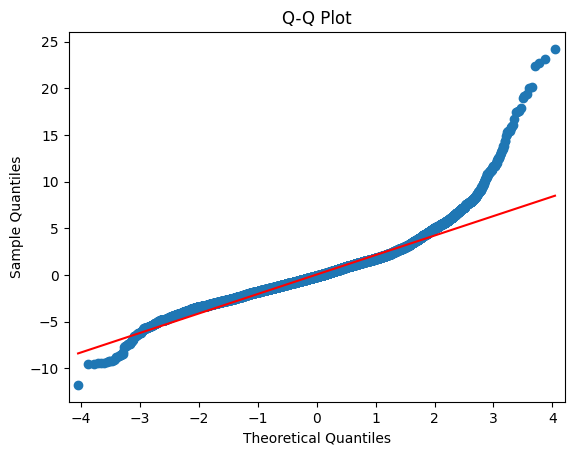

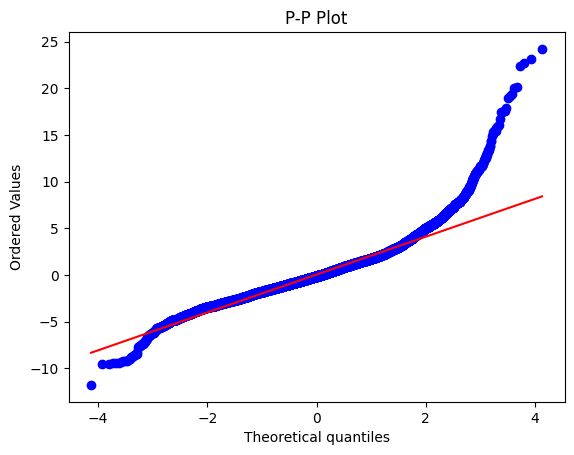

In [ ]:
import statsmodels.api as sm
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred

# Q-Q plot
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

# P-P plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('P-P Plot')
plt.show()

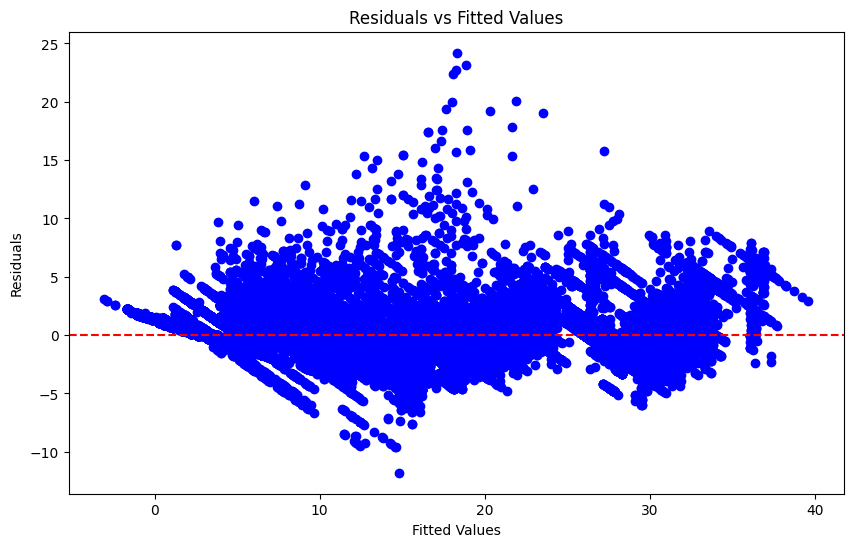

In [ ]:
residuals = y_test - y_pred

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


***Using Lasso Approach***

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)


lasso_reg_predictions = lasso_reg.predict(X_test_scaled)

lasso_reg_rmse = mean_squared_error(y_test, lasso_reg_predictions, squared=False)
lasso_reg_r2 = r2_score(y_test, lasso_reg_predictions)

print("Lasso Regression RMSE:", lasso_reg_rmse)
print("Lasso Regression R^2 Score:", lasso_reg_r2)

Lasso Regression RMSE: 2.207137225676605
Lasso Regression R^2 Score: 0.9400843230098295


***Using Feature Selection in LASSO approach***

In [ ]:
rfe = RFE(estimator=lasso_reg)


rfe.fit(X_train_scaled, y_train)


selected_features = X.columns[rfe.support_]


lasso_reg.fit(X_train_scaled[:, rfe.support_], y_train)


lasso_reg_predictions = lasso_reg.predict(X_test_scaled[:, rfe.support_])

rmse = mean_squared_error(y_test, lasso_reg_predictions, squared=False)

print("Selected features:", selected_features)
print("RMSE:", rmse)

Selected features: Index(['distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'precipIntensity', 'precipProbability',
       'temperatureMin', 'apparentTemperatureMin', 'apparentTemperatureMax',
       'pick_up_Beacon Hill', 'pick_up_Fenway', 'pick_up_Financial District',
       'pick_up_North End', 'destination_South Station',
       'destination_Theatre District', 'destination_West End', 'cab_type_Uber',
       'service_type_Black SUV', 'service_type_Lux', 'service_type_Lux Black',
       'service_type_Lux Black XL', 'service_type_Lyft',
       'service_type_Lyft XL', 'service_type_Shared', 'service_type_Taxi',
       'service_type_UberPool', 'service_type_UberX', 'service_type_UberXL',
       'service_type_WAV'],
      dtype='object')
RMSE: 2.207137225676605


**Decision Tree Regressor Technique**

In [ ]:
dt_reg = DecisionTreeRegressor(random_state=1)

dt_reg.fit(x_train, y_train)

dt_reg_predictions = dt_reg.predict(x_test)

dt_reg_rmse = mean_squared_error(y_test, dt_reg_predictions, squared=False)

dt_reg_r2 = r2_score(y_test, dt_reg_predictions)

print("Decision Tree Regression RMSE:", dt_reg_rmse)

print("Decision Tree Regression R^2 Score:", dt_reg_r2)


Decision Tree Regression RMSE: 2.0145539002691946
Decision Tree Regression R^2 Score: 0.9500840222193168


***Finding Best Parameter For Decision Tree Regressor Model***

In [ ]:

from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


dt_reg = DecisionTreeRegressor(random_state=1)


grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", -best_score)


dt_reg_best = DecisionTreeRegressor(**best_params)
dt_reg_best.fit(x_train, y_train)


dt_reg_best_predictions = dt_reg_best.predict(x_test)


dt_reg_best_rmse = mean_squared_error(y_test, dt_reg_best_predictions, squared=False)
dt_reg_best_r2 = r2_score(y_test, dt_reg_best_predictions)

print("Decision Tree Regression with Grid Search RMSE:", dt_reg_best_rmse)
print("Decision Tree Regression with Grid Search R^2 Score:", dt_reg_best_r2)


Best Parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 2.739663847528682
Decision Tree Regression with Grid Search RMSE: 1.638568848003245
Decision Tree Regression with Grid Search R^2 Score: 0.9669774058296288


In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [13,14,15,16],
    'min_samples_split': [11,14,18],
    'min_samples_leaf': [6,8,10]
}


dt_reg = DecisionTreeRegressor(random_state=1)


grid_search = GridSearchCV(dt_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", -best_score)

dt_reg_best = DecisionTreeRegressor(**best_params)
dt_reg_best.fit(x_train, y_train)


dt_reg_best_predictions = dt_reg_best.predict(x_test)


dt_reg_best_rmse = mean_squared_error(y_test, dt_reg_best_predictions, squared=False)
dt_reg_best_r2 = r2_score(y_test, dt_reg_best_predictions)

print("Decision Tree Regression with Grid Search RMSE:", dt_reg_best_rmse)
print("Decision Tree Regression with Grid Search R^2 Score:", dt_reg_best_r2)


Best Parameters: {'max_depth': 16, 'min_samples_leaf': 10, 'min_samples_split': 11}
Best Score: 2.635648416591641
Decision Tree Regression with Grid Search RMSE: 1.6058114705127173
Decision Tree Regression with Grid Search R^2 Score: 0.9682845475703544


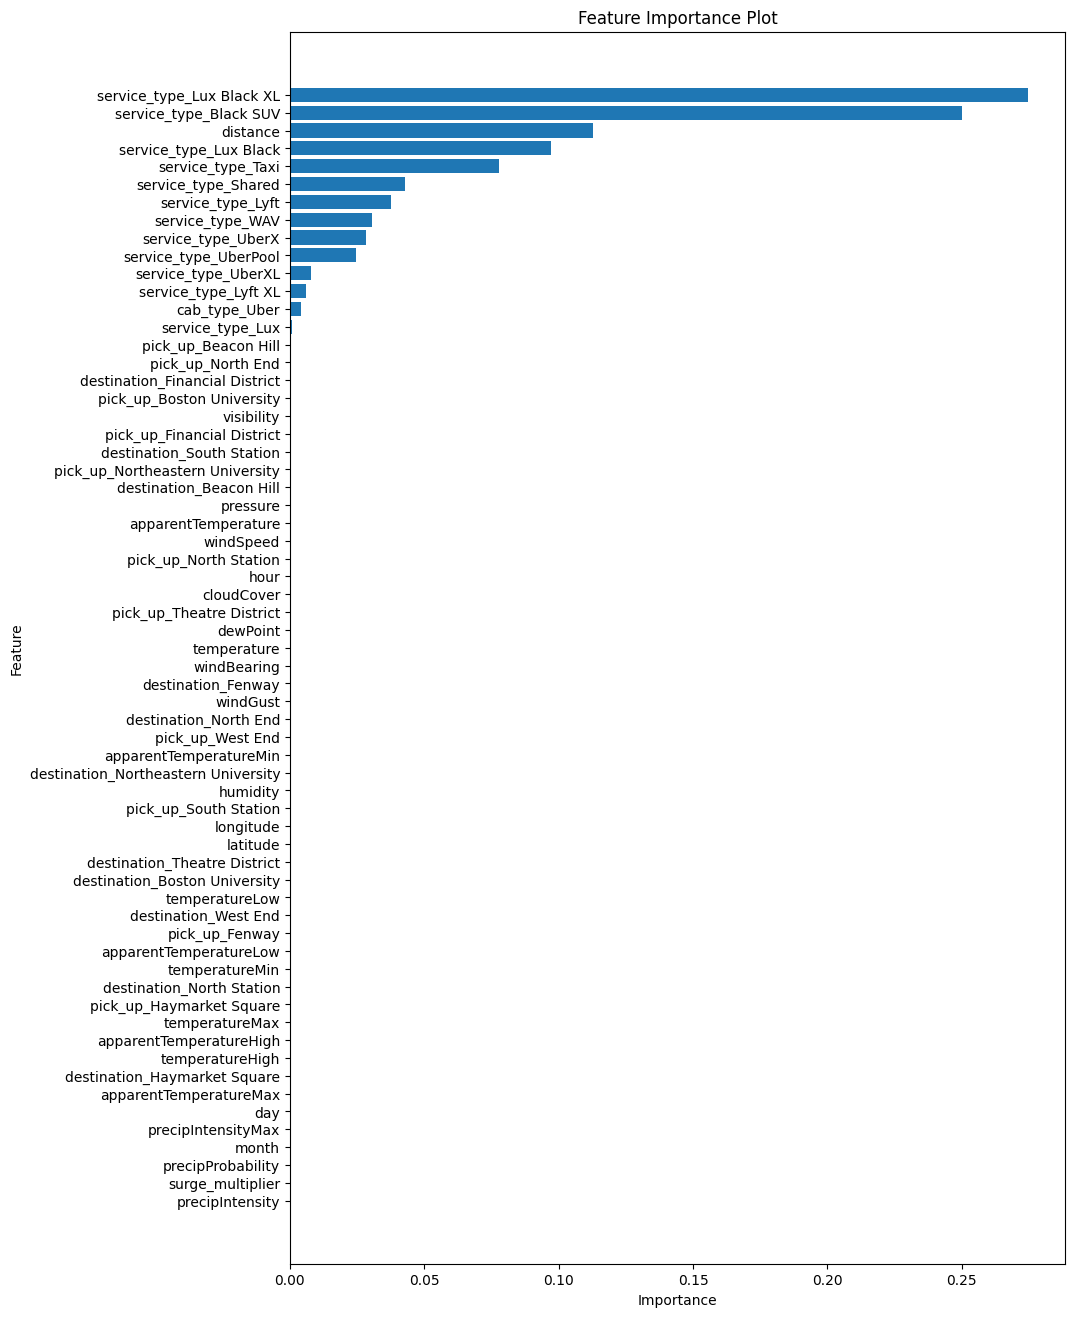

In [ ]:
feature_importances = dt_reg_best.feature_importances_


indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 16))
plt.barh(range(x_train.shape[1]), feature_importances[indices], align='center')
plt.yticks(range(x_train.shape[1]), x_train.columns[indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()

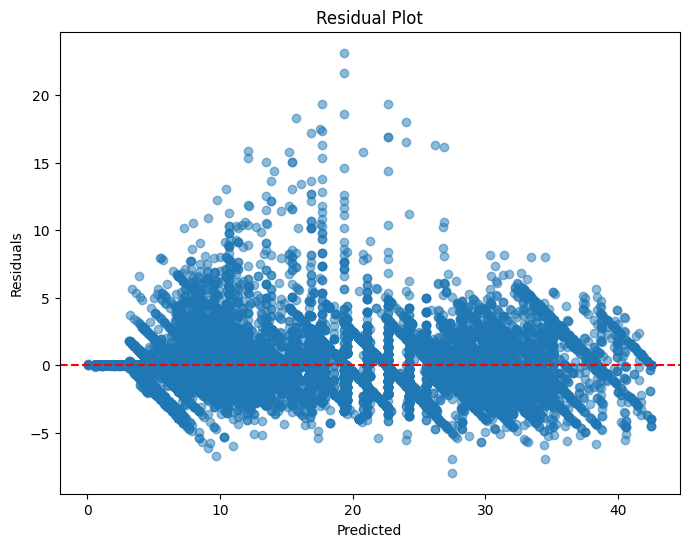

In [ ]:
residuals = y_test - dt_reg_best_predictions

# Plot Residuals
plt.figure(figsize=(8, 6))
plt.scatter(dt_reg_best_predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**Logistic Regression Technique**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


log_reg = LogisticRegression()

selected_categorical= ['pick_up','destination','service_type']
df_encoded_two = pd.get_dummies(cleaned_data, columns=selected_categorical, drop_first=True)

columns_to_drop = ['id', 'long_summary', 'short_summary','datetime']
df_encoded_two = df_encoded_two.drop(columns=columns_to_drop)

datetime_columns = df_encoded_two.select_dtypes(include=['datetime64']).columns
df_encoded_two = df_encoded_two.drop(columns=datetime_columns)

X_Two = df_encoded_two.drop(columns=['cab_type'])
y_Ttwo = df_encoded_two['cab_type']


X_train, X_test, y_train, y_test = train_test_split(X_Two, y_Ttwo, test_size=0.2, random_state=1)


log_reg.fit(X_train, y_train)


y_pred = log_reg.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9911868897785202
Precision: 0.9911978335208085
Recall: 0.9911868897785202
F1-score: 0.991188082798754

Classification Report:
              precision    recall  f1-score   support

        Lyft       0.99      0.99      0.99     16196
        Uber       0.99      0.99      0.99     18525

    accuracy                           0.99     34721
   macro avg       0.99      0.99      0.99     34721
weighted avg       0.99      0.99      0.99     34721



Text(0.5, 23.52222222222222, 'Predicted label')

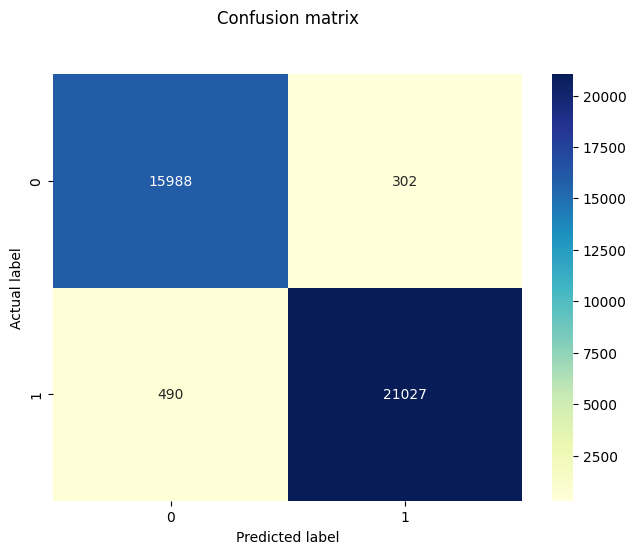

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

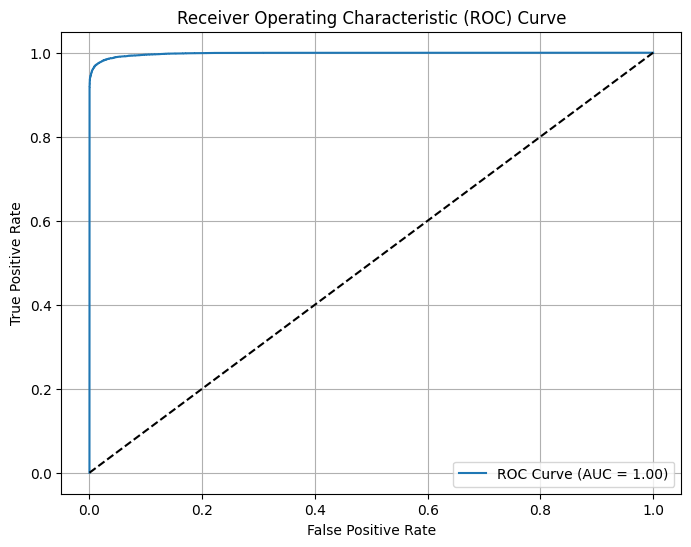

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]


label_binarizer = LabelBinarizer()
y_test_binary = label_binarizer.fit_transform(y_test)


pos_label_index = list(label_binarizer.classes_).index('Lyft')


fpr, tpr, thresholds = roc_curve(y_test_binary[:, pos_label_index], y_pred_proba)


auc = roc_auc_score(y_test_binary[:, pos_label_index], y_pred_proba)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Random Forest Classifier Technique**

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(X_Two, y_Ttwo, test_size=0.2, random_state=1)


rf_clf = RandomForestClassifier(random_state=1)


rf_clf.fit(X_train, y_train)


y_pred = rf_clf.predict(X_test)
y_trainpred = rf_clf.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
accuracy_seenData = accuracy_score(y_train, y_trainpred)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy on Seen Data ",accuracy_seenData)
print("Accuracy on Unseen Data:", accuracy)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on Seen Data  1.0
Accuracy on Unseen Data: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
              precision    recall  f1-score   support

        Lyft       1.00      1.00      1.00     16290
        Uber       1.00      1.00      1.00     21517

    accuracy                           1.00     37807
   macro avg       1.00      1.00      1.00     37807
weighted avg       1.00      1.00      1.00     37807



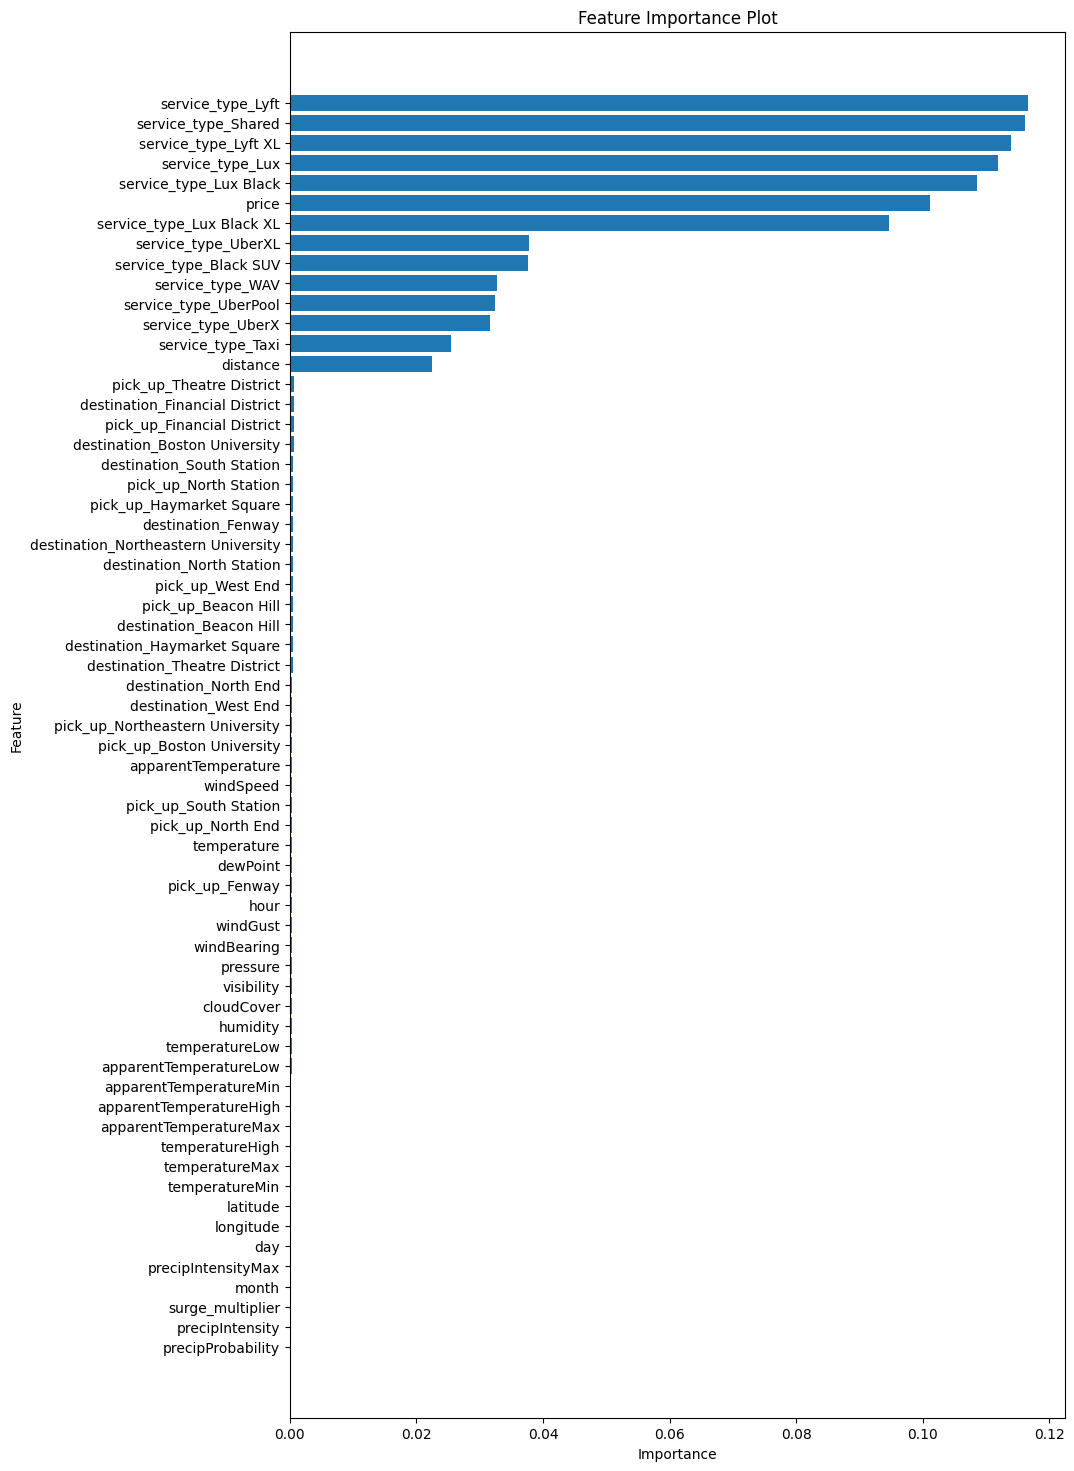

In [ ]:
feature_importances = rf_clf.feature_importances_


feature_names = X_train.columns


sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]


plt.figure(figsize=(10, 18))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances[::-1], tick_label=sorted_feature_names[::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

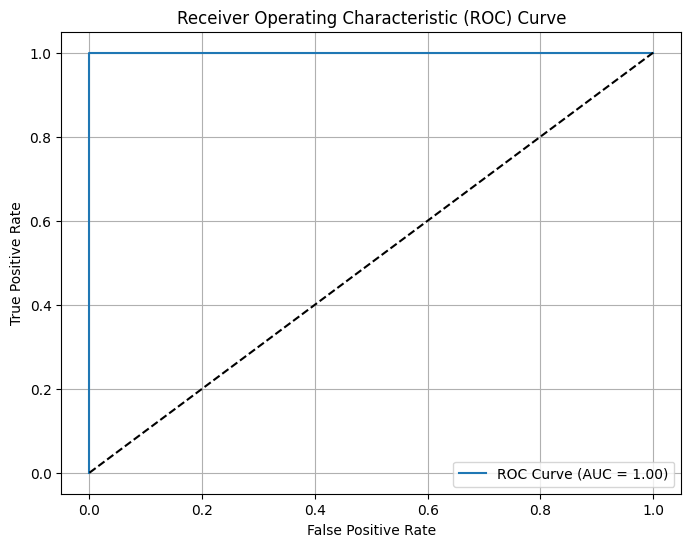

In [ ]:
y_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

label_binarizer = LabelBinarizer()
y_test_binary = label_binarizer.fit_transform(y_test)


pos_label_index = list(label_binarizer.classes_).index('Lyft')


fpr, tpr, thresholds = roc_curve(y_test_binary[:, pos_label_index], y_pred_proba)


auc = roc_auc_score(y_test, y_pred_proba)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Linear Discriminant Analysis Technique**

In [ ]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis()


lda.fit(X_train, y_train)


y_pred = lda.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9181763198064572
Precision: 0.9299869822539452
Recall: 0.9181763198064572
F1-score: 0.918088344448591


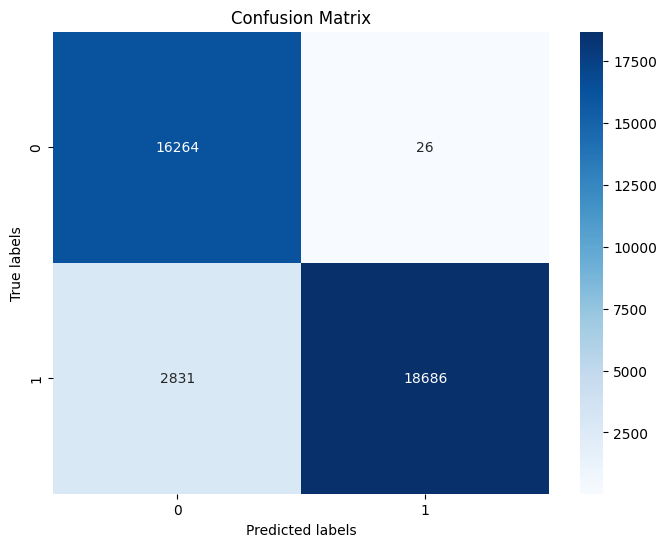

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

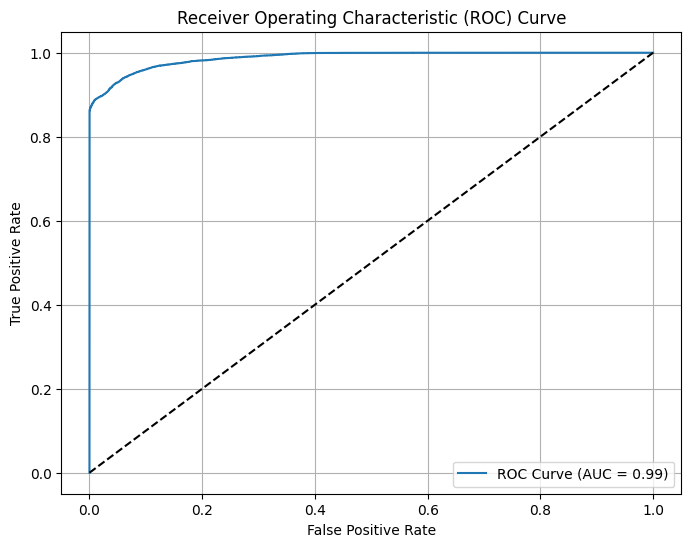

In [ ]:
y_pred_proba = lda.predict_proba(X_test)[:, 1]

label_binarizer = LabelBinarizer()
y_test_binary = label_binarizer.fit_transform(y_test)


pos_label_index = list(label_binarizer.classes_).index('Lyft')


fpr, tpr, thresholds = roc_curve(y_test_binary[:, pos_label_index], y_pred_proba)

auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Finding Best Parameter for LDA Model**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': np.linspace(0.0, 1.0, 10)
}


lda = LinearDiscriminantAnalysis()


grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


lda_best = LinearDiscriminantAnalysis(**best_params)
lda_best.fit(X_train, y_train)


y_pred = lda_best.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Best Parameters: {'shrinkage': 0.0, 'solver': 'lsqr'}
Best Score: 0.9229090630459194
Accuracy: 0.9232681778506626
Precision: 0.9345858358169782
Recall: 0.9232681778506626
F1-score: 0.9236329328171929
